# Plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

if not os.path.exists('plots'):
    os.mkdir('plots')

In [2]:
regrets_dict = {'CN-UCB': '', 'CN-TS': '', 'CN-TS-Opt': '', 'CombLinUCB': '', 'CombLinTS': ''}

In [3]:
def set_regrets_dict(*r_str_tuple):
    for k in regrets_dict:
        regrets_dict[k] = ''
    
    for r_str in r_str_tuple:
        if '_CNUCB_' in r_str:
            regrets_dict['CN-UCB'] = r_str
        elif '_CNTS_' in r_str:
            regrets_dict['CN-TS'] = r_str
        elif '_CNTSOpt_' in r_str:
            regrets_dict['CN-TS-Opt'] = r_str
        elif '_CombLinUCB_' in r_str:
            regrets_dict['CombLinUCB'] = r_str
        elif '_CombLinTS_' in r_str:
            regrets_dict['CombLinTS'] = r_str

def plot(h, d, m, regrets_dict):
    
    h1 = r'$h_{1}(\mathbf{x}) = \mathbf{x}^{\top}\mathbf{a}$'
    h2 = r'$h_{2}(x_{t,i}) = (\mathbf{x}_{t,i}^{\top}\mathbf{a})^{2}$'
    h3 = r'$h_{3}(x_{t,i}) = \cos(\pi \mathbf{x}_{t,i}^{\top}\mathbf{a})$'
    
    marker_list = ['.', 'x', '+', 's', 'd']
    
    if h == "h1":
        hidden = h1
    elif h == "h2":
        hidden = h2
    elif h == "h3":
        hidden = h3
    
    plt.style.use('default')
        
    steps=np.arange(1,T+1)
    freq = int(T/10)
    
    for label, r_str in regrets_dict.items():
        if r_str:
            # total_reg is a numpy array (L x T) where L is the number of repeated experiments
            total_reg = np.load('regrets/' + r_str + '.npy')

            avg_reg = total_reg.mean(axis=0)
            sd_req = total_reg.std(axis=0)

            plt.errorbar(steps, avg_reg, sd_req, errorevery=freq, marker= marker_list.pop(0), markevery=freq, label=label, markersize=6, linewidth=2, elinewidth=1, capsize=3)

    # plt.grid(True)
    plt.grid(color='0.85')
    plt.xlabel('Round ($t$)', size = 14)
    plt.ylabel('Cumulative Regret', size = 14)
    plt.title(r'{}, $d$={}, $m$={}'.format(hidden, d, m), size = 14)
    plt.legend(loc='upper left', prop={'size': 12})
    plt.tick_params(labelsize=12)

In [5]:
T = 1000
d = 80
m = 40
h = 'h1'

In [6]:
set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}')
#set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}', f'reg_{h}_CNTS_{d}_{m}', f'reg_{h}_CNTSOpt_{d}_{m}')

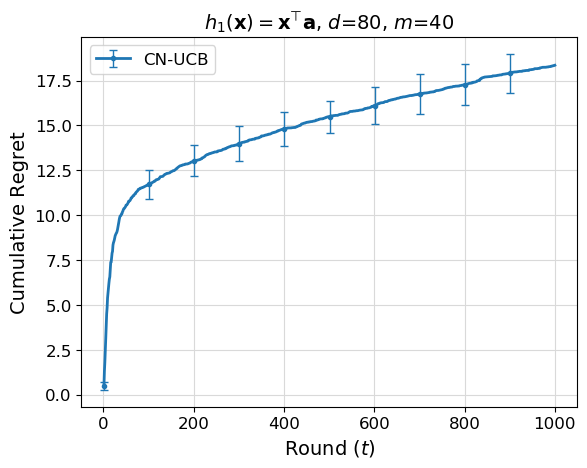

In [7]:
plot(h, d, m, regrets_dict)

In [286]:
T = 100
d = 20
m = 20
h = 'h3'

#set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}', f'reg_{h}_CNTS_{d}_{m}', f'reg_{h}_CNTSOpt_{d}_{m}')
set_regrets_dict(f'reg_{h}_CNUCB_{d}_{m}')
plot(h, d, m, regrets_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'regrets/reg_h3_CNUCB_20_20.npy'